# Deep Neural Network for Image Classification: Application

Let's get started!

## Packages

Let's first import all the packages that you will need during this assignment. 

In [52]:
import time
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy
from PIL import Image
from scipy import ndimage
import skimage.transform
from dnn_app_utils_v2 import *

%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

np.random.seed(1)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Dataset

Let's get more familiar with the dataset. Load the data by running the cell below.

In [3]:
import os
path='C:/Users/FORGE/Documents/Manodhayan_Junks/Python Masterclass/Nueral Networks/Multiple Image Classifier/'
data_path='data/'
os.chdir(path)


#Read Data
def read_data(folder):
    '''Read all the images from the specified folder'''

    index=0
    trainX_list=[];trainY1_list=[];trainY2_list=[];trainY3_list=[];classes=[]
    #train_x=numpy.zeros((img_shape,size))
    os.chdir(path+data_path+folder)
    for fruit in os.listdir():
        os.chdir(path+data_path+folder+'/'+fruit)
        classes.append(fruit)
        print("Index: {}".format(index))
        for image in os.listdir():
            trainX_list.append(np.asarray(plt.imread(str(image))))
            trainY1_list.append(1 if fruit=='Guava' else 0)
            trainY2_list.append(1 if fruit=='Dates' else 0)
            trainY3_list.append(1 if fruit=='Banana' else 0)
            index+=1
            
    '''Format the image data into an numpy array'''
    train_x=np.asarray(trainX_list)
    train_y=np.asarray([trainY1_list,trainY2_list,trainY3_list])
    #train_y=np.asarray([trainY1_list])
    #train_y=train_y.reshape(1,train_y.shape[0])
    os.chdir(path)
    #classes.reverse()
    print(classes)
    return train_x,train_y,classes

train_x_orig,train_y,classes=read_data('train')
test_x_orig,test_y,test_classes=read_data('test')

Index: 0
Index: 490
Index: 980
['Banana', 'Dates', 'Guava']
Index: 0
Index: 166
Index: 332
['Banana', 'Dates', 'Guava']


In [4]:
print(train_x_orig.shape,train_y.shape,classes)
print(train_y,train_y.shape)

(1470, 100, 100, 3) (3, 1470) ['Banana', 'Dates', 'Guava']
[[0 0 0 ... 1 1 1]
 [0 0 0 ... 0 0 0]
 [1 1 1 ... 0 0 0]] (3, 1470)


The following code will show you an image in the dataset.

y = 1. It's a Dates picture.


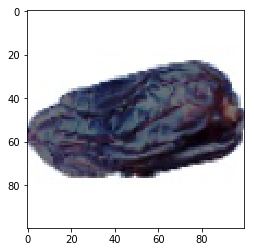

In [5]:
# Example of a picture
index = 500
plt.imshow(train_x_orig[index])
print ("y = " + str(train_y[1,index]) + ". It's a " + classes[train_y[1,index]] +  " picture.")

In [6]:
# Explore your dataset 
m_train = train_x_orig.shape[0]
num_px = train_x_orig.shape[1]
m_test = test_x_orig.shape[0]

print ("Number of training examples: " + str(m_train))
print ("Number of testing examples: " + str(m_test))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_x_orig shape: " + str(train_x_orig.shape))
print ("train_y shape: " + str(train_y.shape))
print ("test_x_orig shape: " + str(test_x_orig.shape))
print ("test_y shape: " + str(test_y.shape))

Number of training examples: 1470
Number of testing examples: 498
Each image is of size: (100, 100, 3)
train_x_orig shape: (1470, 100, 100, 3)
train_y shape: (3, 1470)
test_x_orig shape: (498, 100, 100, 3)
test_y shape: (3, 498)


In [7]:
# Reshape the training and test examples 
train_x_flatten = train_x_orig.reshape(train_x_orig.shape[0], -1).T   # The "-1" makes reshape flatten the remaining dimensions
test_x_flatten = test_x_orig.reshape(test_x_orig.shape[0], -1).T

# Standardize data to have feature values between 0 and 1.
train_x = train_x_flatten/255.
test_x = test_x_flatten/255.

print ("train_x's shape: " + str(train_x.shape))
print ("test_x's shape: " + str(test_x.shape))


train_x's shape: (30000, 1470)
test_x's shape: (30000, 498)


$30,000$ equals $100 \times 100 \times 3$ which is the size of one reshaped image vector.

##  L-layer Neural Network


```python
def initialize_parameters_deep(layer_dims):
    ...
    return parameters 
def L_model_forward(X, parameters):
    ...
    return AL, caches
def compute_cost(AL, Y):
    ...
    return cost
def L_model_backward(AL, Y, caches):
    ...
    return grads
def update_parameters(parameters, grads, learning_rate):
    ...
    return parameters
```

In [8]:
### CONSTANTS ###
layers_dims = [train_x.shape[0], 20, 7, 5, train_y.shape[0]] #  5-layer model
layers_dims

[30000, 20, 7, 5, 3]

In [10]:
# GRADED FUNCTION: L_layer_model

def L_layer_model(X, Y, layers_dims, learning_rate = 0.0075, num_iterations = 3000, print_cost=False):#lr was 0.009
    """
    Implements a L-layer neural network: [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID.
    
    Arguments:
    X -- data, numpy array of shape (number of examples, num_px * num_px * 3)
    Y -- true "label" vector (containing 0 if cat, 1 if non-cat), of shape (1, number of examples)
    layers_dims -- list containing the input size and each layer size, of length (number of layers + 1).
    learning_rate -- learning rate of the gradient descent update rule
    num_iterations -- number of iterations of the optimization loop
    print_cost -- if True, it prints the cost every 100 steps
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """

    np.random.seed(1)
    costs = []                         # keep track of cost
    
    # Parameters initialization.
    ### START CODE HERE ###
    parameters = initialize_parameters_deep(layers_dims)
    ### END CODE HERE ###
    
    # Loop (gradient descent)
    for i in range(0, num_iterations):

        # Forward propagation: [LINEAR -> RELU]*(L-1) -> LINEAR -> SIGMOID.
        ### START CODE HERE ### (≈ 1 line of code)
        AL, caches = L_model_forward(X, parameters)
        ### END CODE HERE ###
        
        # Compute cost.
        ### START CODE HERE ### (≈ 1 line of code)
        cost = compute_cost(AL, Y)
        ### END CODE HERE ###
    
        # Backward propagation.
        ### START CODE HERE ### (≈ 1 line of code)
        grads = L_model_backward(AL, Y, caches)
        ### END CODE HERE ###
 
        # Update parameters.
        ### START CODE HERE ### (≈ 1 line of code)
        parameters = update_parameters(parameters, grads, learning_rate=learning_rate)
        ### END CODE HERE ###
                
        # Print the cost every 100 training example
        if print_cost and i % 100 == 0:
            #print ("Cost after iteration %i: %f" %(i, cost))
            print("Cost after iteration {} : {}".format(i,cost))
#         if print_cost and i % 100 == 0:
#             costs.append(cost)
            
#     # plot the cost
#     plt.plot(np.squeeze(costs))
#     plt.ylabel('cost')
#     plt.xlabel('iterations (per tens)')
#     plt.title("Learning rate =" + str(learning_rate))
#     plt.show()
    
    return parameters

You will now train the model as a 5-layer neural network. 

Run the cell below to train your model. The cost should decrease on every iteration. It may take up to 5 minutes to run 2500 iterations. Check if the "Cost after iteration 0" matches the expected output below, if not click on the square (⬛) on the upper bar of the notebook to stop the cell and try to find your error.

In [11]:
parameters = L_layer_model(train_x, train_y, layers_dims, num_iterations = 2500, print_cost = True)

Cost after iteration 0 : [[0.73208988 0.73376425 0.65059887]
 [0.73420583 0.72794286 0.67294062]
 [0.71811324 0.71203546 0.68021278]]
Cost after iteration 100 : [[0.60017397 1.1191536  1.22111438]
 [0.78418832 0.28573539 2.95227397]
 [0.5678006  1.66660833 0.30144755]]
Cost after iteration 200 : [[0.20991336 2.24229477 2.25544612]
 [1.29592719 0.04903933 5.98475923]
 [1.12005839 4.19642723 0.06809741]]
Cost after iteration 300 : [[0.04046078 3.06546729 3.23114578]
 [2.81961006 0.0150457  7.6356273 ]
 [2.31830857 5.75432303 0.02196942]]
Cost after iteration 400 : [[1.51486944e-02 3.67438692e+00 3.89847537e+00]
 [3.77222729e+00 6.49278630e-03 8.57630212e+00]
 [3.01527543e+00 6.63122375e+00 8.48947547e-03]]
Cost after iteration 500 : [[7.84240713e-03 4.10061565e+00 4.34385483e+00]
 [4.39814399e+00 3.62021473e-03 9.18550330e+00]
 [3.48607528e+00 7.19993335e+00 4.42933590e-03]]
Cost after iteration 600 : [[4.87861222e-03 4.42733994e+00 4.67676951e+00]
 [4.85122115e+00 2.35704337e-03 9.64958

In [48]:
pred_train = predict(train_x, train_y, parameters,3)

Accuracy: 0.9999999999999999


In [45]:
print("Predicted: {}".format([pred_train[0,1],pred_train[1,1],pred_train[2,1]]))
print("Actual: {}".format([train_y[0,1],train_y[1,1],train_y[2,1]]))

Predicted: [0.0, 0.0, 1.0]
Actual: [0, 0, 1]


In [49]:
pred_test = predict(test_x, test_y, parameters,3)


Accuracy: 1.0


In [46]:
print("Predicted: {}".format([pred_test[0,1],pred_test[1,1],pred_test[2,1]]))
print("Actual: {}".format([test_y[0,1],test_y[1,1],test_y[2,1]]))

Predicted: [0.0, 0.0, 1.0]
Actual: [0, 0, 1]


In [41]:
classes

['Banana', 'Dates', 'Guava']

##  6) Results Analysis

First, let's take a look at some images the L-layer model labeled incorrectly. This will show a few mislabeled images. 

In [14]:
print_mislabeled_images(classes, test_x, test_y, pred_test)

## 7-Test with your own image


In [53]:
os.chdir(path)
my_image = "my_image.jpg"
my_label_y = None 

num_px=100
fname = "images/" + my_image
image = np.array(plt.imread(fname))
my_image = skimage.transform.resize(image, output_shape=(num_px,num_px)).reshape((num_px*num_px*3,1))
my_predicted_image = predict(my_image, my_label_y, parameters,3)
print(my_predicted_image)
# plt.imshow(image)
# print("y = " + str(np.squeeze(my_predicted_image))+", your L-layer model predicts a \""+classes[int(np.squeeze(my_predicted_image))]+"\" picture.")
# print ("y = " + str(np.squeeze(my_predicted_image)) + ", your L-layer model predicts a \"" + classes[int(np.squeeze(my_predicted_image)),] +  "\" picture.")

Accuracy: 0.0
[[0.]
 [0.]
 [1.]]


C:\Users\FORGE\Anaconda3\lib\site-packages\skimage\transform\_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\Users\FORGE\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


**References**:

- for auto-reloading external module: http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython

In [18]:
%load_ext version_information
%version_information numpy, PIL, matplotlib, scipy, skimage

Software versions
Python 3.6.6 64bit [GCC 4.2.1 Compatible Apple LLVM 6.1.0 (clang-602.0.53)]
IPython 7.0.1
OS Darwin 17.7.0 x86_64 i386 64bit
numpy 1.15.1
PIL 5.3.0
matplotlib 3.0.0
scipy 1.1.0
skimage 0.14.1
Sun Oct 14 21:16:14 2018 MDT